## Basics of OLS in Python

In [2]:
import numpy as np  #линейная алгебра
import pandas as pd #работа с датасетом
%matplotlib inline 
from matplotlib import pyplot as plt #визуализация
import seaborn as sns  #визуализация
sns.set()
from sklearn.datasets import load_boston #встроенный датасет 
from sklearn.model_selection import cross_val_score, KFold #кросс-валидация из пакета с мл
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge #модели
from sklearn.linear_model import LinearRegression

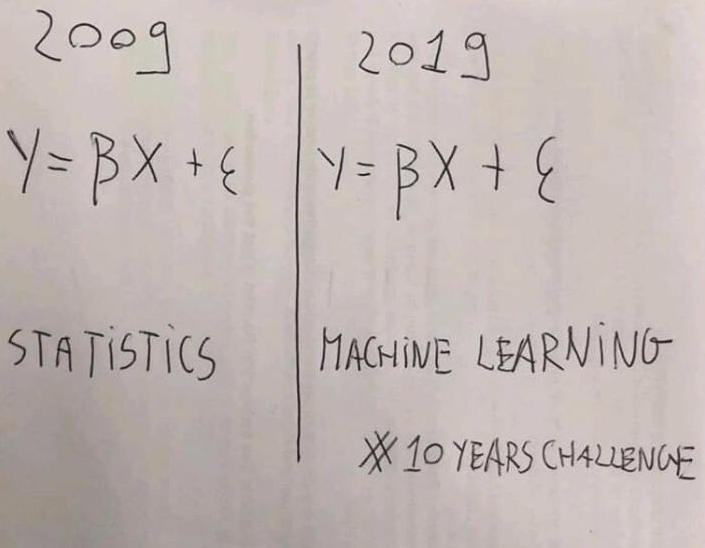

In [134]:
from IPython.display import Image
Image(filename='/Users/aleksandr/Desktop/LpWd3sjYaEU.jpg')

In [3]:
X = np.array([10.20, 13.72, 13.78, 14.37 ,15.00 ,15.02,15.12,15.24,15.24,15.28,15.43,15.67,15.67,15.98,16.50,16.87,17.26,17.28,17.87,19.13])

In [4]:
y=np.array([25.93,45.87,56.20,58.60,63.36,46.35,68.99,62.91,58.13,59.79,56.20,66.16,62.18,57.01,65.62,65.03,66.74,73.38,82.87,95.71])

## Простой пример 

In [12]:
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    

In [13]:
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

Базовые метрики:

1. Sum of Squared Errors (SSE)
2. Total Sum of Squares (SST)
3. $R^{2}$ 
4. adj $R^{2}$


$SSE = \sum_{i=1}^{m} {(y_{i} - \hat{y_{i}})^{2}}$  - метрика того, насколько далеки прогнозы нашей модели от наблюдаемых значений. Значение 0 указывает на идеальные прогнозы. Ненулевое значение указывает на ошибки. (Нулевого значения на реальных данных быть не может тк мы всегда ожидаем присутствие ошибки в данных)

$SST = \sum_{i=1}^{m} (y - \bar{y})^{2}$ - метрика дисперсии в таргетной переменной. Он измеряется как сумма каждого наблюдения от среднего значения

$R^{2} = 1 - \frac{SSE}{SST}$ - метрика оценки того, какое количество дисперсии объясняется нашей моделью

adj $R^{2} = 1 - \frac{SSE*df_{t}}{SST*df_{e}}$ - модифицированная версия R-квадрата, учитывающая количество фич в модели


In [7]:
linear = LinearRegression()
linear.fit(X.reshape(-1,1), y);

In [9]:
print('R sqaured:', linear.score(X.reshape(-1,1), y))

R sqaured: 0.8241168108845187


In [10]:
s1 = Stats(X.reshape(-1,1), y, linear)

In [11]:
pretty_print_stats(s1)

sse:     658.5697
sst:     3744.3585


In [64]:
import statsmodels.api as sm

lin_reg = sm.OLS(y,X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1245.
Date:                Sun, 18 Aug 2019   Prob (F-statistic):           8.75e-19
Time:                        00:47:27   Log-Likelihood:                -69.376
No. Observations:                  20   AIC:                             140.8
Df Residuals:                      19   BIC:                             141.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.0210      0.114     35.283      0.000       3.783       4.260
==============================================================================
Omnibus:                        1.845   Durbin-Watson:                   1.120
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                0.588
Skew:                           0.338   Prob(JB):                        0.745
Kurtosis:                       3.497   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression Assumptions

1. Linear relationship between target and features
2. No outliers
3. No high-leverage points 
4. Homoscedasticity of error terms
5. Uncorrelated error terms 
6. Independent features

In [ ]:
plt.plot(X, y, 'bo', label='actual')
plt.plot(X, linear.predict(X.reshape(-1,1)), 'k', label='predicted')
plt.title('Linear Relationship w/Gaussian Noise')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.grid()
plt.legend();

In [22]:
y_nonlinear = [X**3 + np.random.rand(1)*10 for X in range(len(X))]

In [23]:
nonlinear = LinearRegression()
nonlinear.fit(X.reshape(-1,1), y_nonlinear);

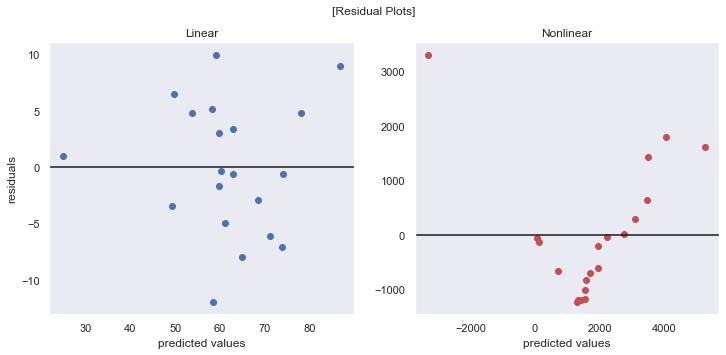

In [25]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(linear.predict(X.reshape(-1,1)), y-linear.predict(X.reshape(-1,1)), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Linear')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].plot(nonlinear.predict(X.reshape(-1,1)), y_nonlinear-nonlinear.predict(X.reshape(-1,1)), 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Nonlinear')
axes[1].set_xlabel('predicted values');

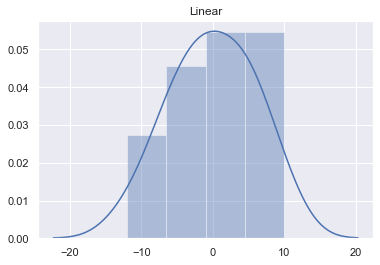

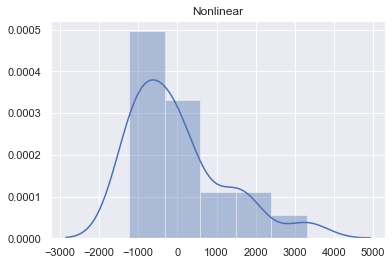

In [27]:
residuals_linear = y - linear.predict(X.reshape(-1,1))
residuals_nlinear = y_nonlinear - nonlinear.predict(X.reshape(-1,1))

sns.distplot(residuals_linear);
plt.title('Linear')
plt.show()

sns.distplot(residuals_nlinear)
plt.title('Nonlinear');

делать ли проверку всех ассампшнов??

## Тренировочный датасет - boston houseprices
пробуем линейную модель


накручиваем L1, L2 регуляризацию


In [280]:
from sklearn.datasets import load_boston
boston = load_boston()

In [281]:

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='MEDV')

In [282]:
data = pd.DataFrame(boston.data)

In [283]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**CRIM** per capita crime rate by town


**ZN** proportion of residential land zoned for lots over 25,000 sq.ft. 


**INDUS** proportion of non-retail business acres per town 


**CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 


**NOX** nitric oxides concentration (parts per 10 million) 


**RM** average number of rooms per dwelling 


**AGE** proportion of owner-occupied units built prior to 1940 


**DIS** weighted distances to five Boston employment centres 


**RAD** index of accessibility to radial highways 


**TAX** full-value property-tax rate per 10,000usd 


**PTRATIO** pupil-teacher ratio by town 


**B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 


**LSTAT** % lower status of the population 



In [284]:
data['PRICE'] = boston.target 

In [285]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [286]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [287]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


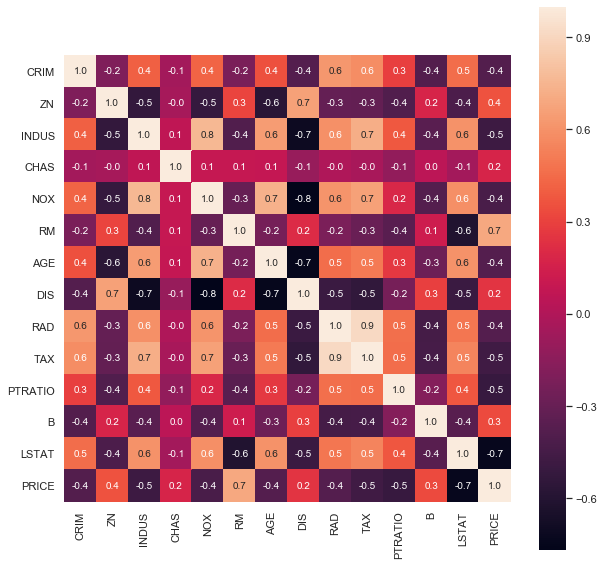

In [288]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True, square= True, fmt='.1f', annot=True)

In [289]:
X = data.drop(['PRICE', 'CHAS'], axis = 1)
y = data['PRICE']

In [290]:
lm = LinearRegression()
lm.fit(X, y);

In [291]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [292]:
lm.intercept_

36.89195979693247

In [293]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_])
coeffcients = coeffcients.rename(columns={0: 'Feature', 1: 'Coefficients'})
coeffcients

,Feature,Coefficients,2,3,4,5,6,7,8,9,10,11
0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,-0.113139,0.0470525,0.0403115,-17.367,3.85049,0.00278376,-1.48537,0.328311,-0.0137558,-0.990958,0.00974145,-0.534158


In [294]:
y_pred = lm.predict(X_train)

In [295]:
from sklearn import metrics
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7303291798370908
Adjusted R^2: 0.7208392976026189
MAE: 3.152652558540078
MSE: 20.29834636945946
RMSE: 4.505368616379736


In [310]:
y_pred = lm.predict(X_test)

In [312]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7409161462166374
Adjusted R^2: 0.7185491948108795
MAE: 3.6150642470559817
MSE: 27.053554739120525
RMSE: 5.201303177004829


In [329]:
(20.29834636945946+27.053554739120525)/2 * 1000

23675.95055428999

In [298]:
import statsmodels.api as sm

lin_reg = sm.OLS(y,X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     947.6
Date:                Sun, 18 Aug 2019   Prob (F-statistic):               0.00
Time:                        22:48:20   Log-Likelihood:                -1528.8
No. Observations:                 506   AIC:                             3082.
Df Residuals:                     494   BIC:                             3132.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0982      0.035     -2.829      0.005      -0.166      -0.030
ZN             0.0494      0.015      3.401      0.001       0.021       0.078
INDUS          0.0166      0.065      0.257      0.797      -0.110       0.144
NOX           -2.2558      3.383     -0.667      0.505      -8.903       4.392
RM             5.9980      0.311     19.280      0.000       5.387       6.609
AGE           -0.0051      0.014     -0.370      0.712      -0.033       0.022
DIS           -0.9725      0.197     -4.927      0.000      -1.360      -0.585
RAD            0.1931      0.067      2.883      0.004       0.061       0.325
TAX           -0.0109      0.004     -2.766      0.006      -0.019      -0.003
PTRATIO       -0.4257      0.110     -3.858      0.000      -0.643      -0.209
B              0.0154      0.003      5.683      0.000       0.010       0.021
LSTAT         -0.4249      0.051     -8.304      0.000      -0.525      -0.324
==============================================================================
Omnibus:                      215.812   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1464.802
Skew:                           1.720   Prob(JB):                         0.00
Kurtosis:                      10.592   Cond. No.                     8.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Populating the interactive namespace from numpy and matplotlib


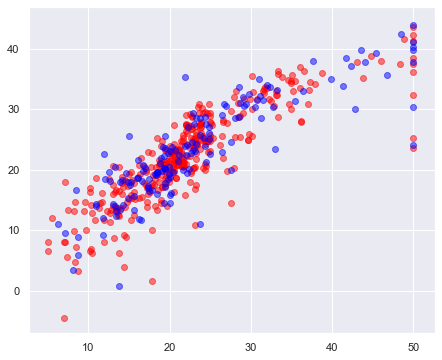

In [299]:
%pylab inline
pylab.figure(figsize = (16,6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(y_train, lm.predict(X_train), alpha = 0.5, color = 'red')
pylab.scatter(y_test, lm.predict(X_test), alpha = 0.5, color = 'blue')

In [300]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

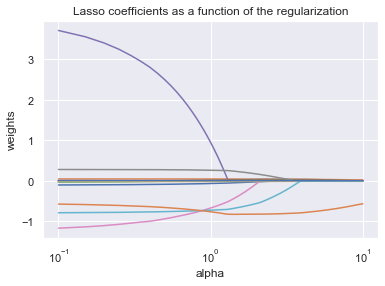

In [301]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
ax = plt.gca()
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show();

In [305]:
lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
        verbose=False)

In [306]:
lasso_cv.alpha_

0.1

In [307]:
cross_val_score(Lasso(lasso_cv.alpha_), X_train, y_train, cv=3, 
                scoring='neg_mean_squared_error')

array([-24.77966219, -15.74313677, -25.31759442])

In [309]:
abs(cross_val_score(Lasso(lasso_cv.alpha_), X_train, y_train, cv=3, 
                        scoring='neg_mean_squared_error').mean())

21.946797793377414

In [315]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

In [323]:
ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [324]:
ridge_cv.alpha_

264.30814869741084

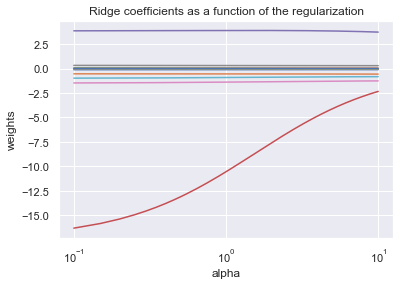

In [325]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
model = Ridge()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
ax = plt.gca()
# ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [326]:
cross_val_score(Ridge(ridge_cv.alpha_), X_train, y_train, cv=3, 
                scoring='neg_mean_squared_error')

array([-29.17475649, -17.02247827, -28.05551822])

In [330]:
print(abs(cross_val_score(Lasso(lasso_cv.alpha_), X_train, y_train, cv=3, 
                        scoring='neg_mean_squared_error').mean()) * 1000)

21946.797793377413


## Тренировочный датасет https://www.kaggle.com/c/bike-sharing-demand/

In [190]:
train=pd.read_csv('/Users/aleksandr/Desktop/bike-sharing-demand/train.csv')
df=train.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Features description**

datetime - hourly date + timestamp  


season -  1 = spring, 2 = summer, 3 = fall, 4 = winter



holiday - whether the day is considered a holiday


workingday - whether the day is neither a weekend nor holiday



weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 


2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 


3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 


4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 


temp - temperature in Celsius


atemp - "feels like" temperature in Celsius


humidity - relative humidity


windspeed - wind speed


casual - number of non-registered user rentals initiated


registered - number of registered user rentals initiated


**count - number of total rentals** - Dependent Var


In [177]:
df.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,hour,month
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,0.029108,0.685815,20.620607,24.012865,64.125212,12.631157,11.555367,6.565070
std,0.168123,0.464226,8.059583,8.782741,19.293391,8.250151,6.912526,3.429462
min,0.000000,0.000000,0.820000,0.000000,16.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,49.000000,7.001500,6.000000,4.000000
50%,0.000000,1.000000,21.320000,25.000000,65.000000,11.001400,12.000000,7.000000
75%,0.000000,1.000000,27.060000,31.060000,81.000000,16.997900,18.000000,10.000000
max,1.000000,1.000000,40.180000,50.000000,100.000000,55.998600,23.000000,12.000000


In [191]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

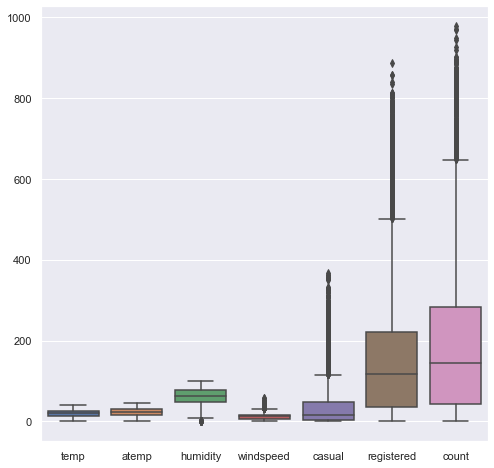

In [192]:
sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [193]:
df = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())] 
df = df[np.abs(df["registered"]-df["registered"].mean())<=(3*df["registered"].std())] 

In [194]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1


In [195]:
df.drop('datetime',axis=1,inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1


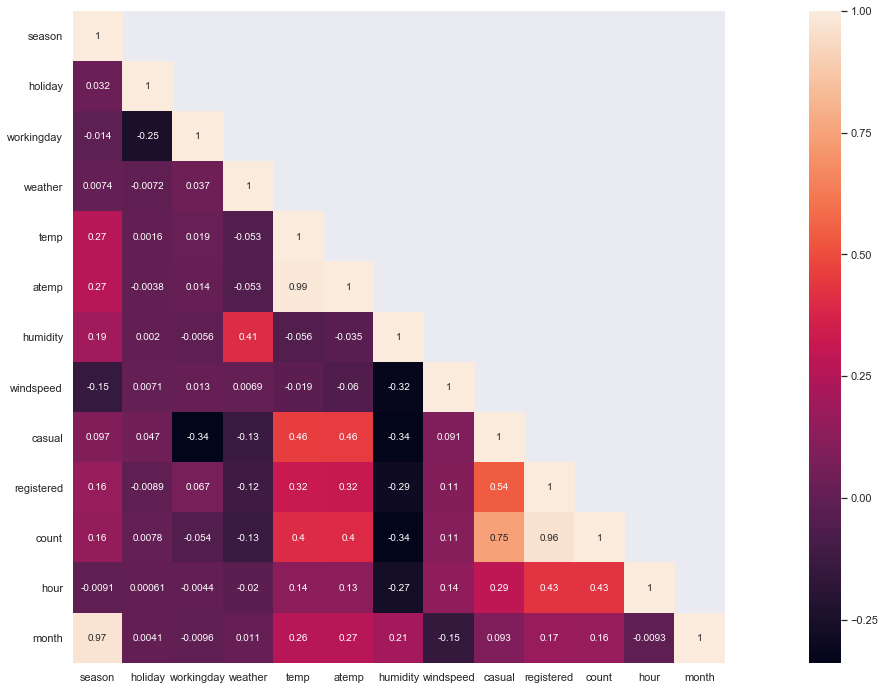

In [196]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [197]:
df.drop(['casual','registered','season','weather'],axis=1,inplace=True)

In [198]:
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,hour,month
0,0,0,9.84,14.395,81,0.0,16,0,1
1,0,0,9.02,13.635,80,0.0,40,1,1
2,0,0,9.02,13.635,80,0.0,32,2,1
3,0,0,9.84,14.395,75,0.0,13,3,1
4,0,0,9.84,14.395,75,0.0,1,4,1


In [199]:
train_data = df.iloc[:-2000, :]
test_data = df.iloc[-2000:, :]

In [200]:
y_train = train_data['count'].values
X_train = train_data.drop(['count'], axis = 1)

In [201]:
y_test = test_data['count'].values
X_test = test_data.drop(['count'], axis = 1)

In [202]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
print(lm.coef_)

49.69942196759233
[-11.60423987 -15.11691235  -1.62090377   7.63603574  -1.86331937
   0.36025223   6.58423636   2.20605085]


In [203]:
predictions = lm.predict(X_train)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


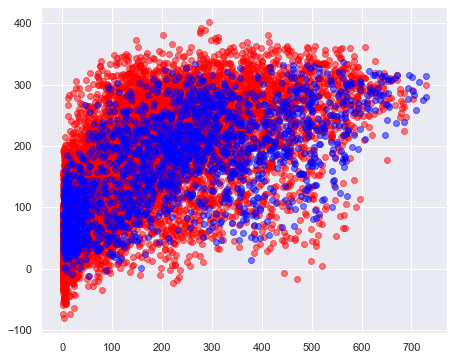

In [204]:
%pylab inline
pylab.figure(figsize = (16,6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(y_train, lm.predict(X_train), alpha = 0.5, color = 'red')
pylab.scatter(y_test, lm.predict(X_test), alpha = 0.5, color = 'blue')

In [205]:
r2_score(y_train,predictions)

0.37256037221483873

In [206]:
metrics.mean_absolute_error(y_train,predictions)

89.41175665002417

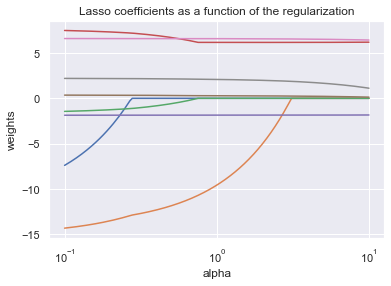

In [207]:
n_alphas = 1000
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show();

In [208]:
lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.10990991,  0.11981982,  0.12972973,  0.13963964,
        0.14954955,  0.15945946,  0.16936937,  0.17927928,  0.18918919,
        0.1990991 ,  0.20900901,  0.21891892,  0.22882883,  0.23873874,
        0.24864865,  0.25855856,  0.26846847,  0.27837838,  0.28828829,
        0.2981982 ,  0.30810811,  0.31801802,  0.32792793,  0.33783784,
        0.34774775,  0.35765766,  0.36756757,  0.37747748,  0.38738739,
        0.39729...
        9.86126126,  9.87117117,  9.88108108,  9.89099099,  9.9009009 ,
        9.91081081,  9.92072072,  9.93063063,  9.94054054,  9.95045045,
        9.96036036,  9.97027027,  9.98018018,  9.99009009, 10.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
        verbose=False)

In [209]:
lasso = Lasso(alpha= lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [210]:
y_pred=lasso.predict(X_train)

In [211]:
metrics.mean_absolute_error(y_train,lasso.predict(X_train))

89.80694900067849

In [212]:
n_alphas = 100
ridge_alphas = np.logspace(-2, 6, n_alphas)
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.20450354e-02, 1.45082878e-02, 1.74752840e-02,
       2.10490414e-02, 2.53536449e-02, 3.05385551e-02, 3.67837977e-02,
       4.43062146e-02, 5.33669923e-02, 6.42807312e-02, 7.74263683e-02,
       9.32603347e-02, 1.12332403e-01, 1.35304777e-01, 1.62975083e-01,
       1.96304065e-01, 2.36448941e-01, 2.84803587e-01, 3.43046929e-01,
       4.13201240e-01, 4.97702356e-0...
       2.91505306e+04, 3.51119173e+04, 4.22924287e+04, 5.09413801e+04,
       6.13590727e+04, 7.39072203e+04, 8.90215085e+04, 1.07226722e+05,
       1.29154967e+05, 1.55567614e+05, 1.87381742e+05, 2.25701972e+05,
       2.71858824e+05, 3.27454916e+05, 3.94420606e+05, 4.75081016e+05,
       5.72236766e+05, 6.89261210e+05, 8.30217568e+05, 1.00000000e+06]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [213]:
ridge_cv.alpha_

89021.50854450393

In [214]:
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, y_train)
metrics.mean_absolute_error(y_train,ridge.predict(X_train))

90.44874085227141

In [218]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

[18:25:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [219]:
y_pred = reg.predict(X_train)

In [220]:
metrics.mean_absolute_error(y_train,reg.predict(X_train))

46.57356901118081

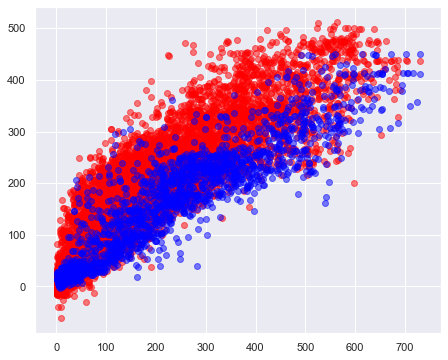

In [222]:
pylab.figure(figsize = (16,6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(y_train, reg.predict(X_train), alpha = 0.5, color = 'red')
pylab.scatter(y_test, reg.predict(X_test), alpha = 0.5, color = 'blue')

In [215]:
from sklearn.ensemble import RandomForestRegressor

In [216]:
regressor = RandomForestRegressor(random_state = 1)
regressor.fit(X_train, y_train)
metrics.mean_absolute_error(y_train,regressor.predict(X_train))


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


14.892942857142858

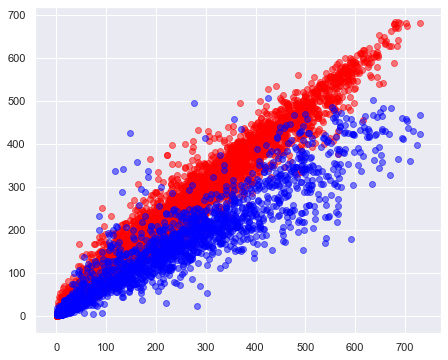

In [217]:
pylab.figure(figsize = (16,6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(y_train, regressor.predict(X_train), alpha = 0.5, color = 'red')
pylab.scatter(y_test, regressor.predict(X_test), alpha = 0.5, color = 'blue')